<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MSM" data-toc-modified-id="MSM-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MSM</a></span></li><li><span><a href="#SQRA" data-toc-modified-id="SQRA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SQRA</a></span></li><li><span><a href="#Geometrical-properties-of-FullGrid" data-toc-modified-id="Geometrical-properties-of-FullGrid-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Geometrical properties of FullGrid</a></span></li><li><span><a href="#Timing" data-toc-modified-id="Timing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Timing</a></span></li></ul></div>

In [3]:
import sys
import os

try:
    os.chdir(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup/molgri")
    sys.path.append(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup")
except FileNotFoundError:
    os.chdir(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    sys.path.append(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from molgri.plotting.widgets import ViewManager
from molgri.space.fullgrid import FullGrid
from molgri.molecules.transitions import MSM, SimulationHistogram, SQRA
from molgri.space.utils import k_argmax_in_array
from molgri.plotting.transition_plots import TransitionPlot
from molgri.paths import PATH_OUTPUT_LOGGING

sns.set_context("notebook")

In [5]:
# view functions adapted for eigenvectors

def view_most_populated_eigenv(my_sh, eigenvector_i=0, num_extremes=20, tau_i=0):
    vm = ViewManager(my_sh.trajectory_universe)
    vm.fresh_view()
    my_sh.use_saved = True

    evalu, evec = my_sh.get_transition_model().get_eigenval_eigenvec()
    magnitudes = evec[tau_i].T[eigenvector_i]

    most_positive = k_argmax_in_array(np.abs(magnitudes), num_extremes)

    print(f"In 0th eigenvector {num_extremes} most positive cells are {list(most_positive)}.")
    # now assign these to trajectory frames
    assigned_frames = []
    for one_argmax in most_positive:
        all_assigned = my_sh.get_indices_same_cell(one_argmax)
        assigned_frames.extend(all_assigned)

    # for gromacs
    print(list(np.random.choice(assigned_frames, 300)))
    vm.plot_frames_overlapping(np.random.choice(assigned_frames, 50))
    return vm

def view_most_pos_neg_eigenv(my_sh, eigenvector_i=1, num_extremes=20, tau_i=0):
    vm = ViewManager(my_sh.trajectory_universe)
    vm.fresh_view()
    my_sh.use_saved = True

    evalu, evec = my_sh.get_transition_model().get_eigenval_eigenvec()
    magnitudes = evec[tau_i].T[eigenvector_i]

    most_positive = k_argmax_in_array(magnitudes, num_extremes)
    most_negative = k_argmax_in_array(-magnitudes, num_extremes)


    print(f"In 1st eigenvector {num_extremes} most positive cells are {list(most_positive)} and most negative {list(most_negative)}.")
    # now assign these to trajectory frames

    assigned_frames_p = []
    for one_argmax in most_positive:
        all_assigned = my_sh.get_indices_same_cell(one_argmax)
        assigned_frames_p.extend(all_assigned)
    assigned_frames_n = []
    for one_argmax in most_negative:
        all_assigned = my_sh.get_indices_same_cell(one_argmax)
        assigned_frames_n.extend(all_assigned)

    colors = ["blue",]*25
    colors.extend(["red",]*25)

    assigned_frames = list(np.random.choice(assigned_frames_p, 25))
    assigned_frames.extend(list(np.random.choice(assigned_frames_n, 25)))
    # for gromacs
    print(list(assigned_frames))
    vm.plot_frames_overlapping(assigned_frames, colors=colors)
    return vm

## MSM

In [4]:
# input parameters
msm_name = "H2O_H2O_0095_50000000"
msm_fullgrid = full_grid=FullGrid(b_grid_name="20", o_grid_name="20",
                                  t_grid_name="linspace(0.2, 0.6, 10)")

#o_grid=40, b_grid=42, t_grid=linspace(0.2, 0.7, 20)
msm_use_saved = True
tau_array = np.array([1, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 70, 80, 90, 100, 110, 130, 150, 180, 200, 220,
                      250, 270, 300])
index_tau = 17

In [5]:
water_msm_sh = SimulationHistogram(msm_name, "H2O", is_pt=False, full_grid=msm_fullgrid,
                                   second_molecule_selection="bynum 4:6", use_saved=msm_use_saved)
msm = MSM(water_msm_sh, tau_array=tau_array, use_saved=msm_use_saved)

In [ ]:
msm_tp = TransitionPlot(water_msm_sh, tau_array=tau_array)
msm_tp.transition_obj = msm
msm_tp.simulation_histogram.use_saved = True
msm_tp.transition_obj.use_saved=True
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10, 5))
msm_tp.plot_eigenvalues(num_eigenv=6, index_tau=index_tau, save=False, fig=fig, ax=ax[0])
msm_tp.plot_its(6, as_line=False, save=False, fig=fig, ax=ax[1])
plt.show()

In [ ]:
fig, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(5, 12.5))
for i in range(5):
    tp.plot_one_eigenvector_flat(i, save=False, fig=fig, ax=ax[i], index_tau=index_tau)
plt.show()

In [ ]:
# MSM eigenvector 0
my_vm = view_most_populated_eigenv(water_msm_sh, 0, num_extremes=20, tau_i=index_tau)
my_vm.view

In [ ]:
# MSM view eigenvector 1
my_vm = view_most_pos_neg_eigenv(water_msm_sh, 1, num_extremes=20, tau_i=index_tau)
my_vm.view

In [ ]:
# MSM view eigenvector 2
my_vm = view_most_pos_neg_eigenv(water_msm_sh, 2, num_extremes=20, tau_i=index_tau)
my_vm.view

In [ ]:
# MSM view eigenvector 3
my_vm = view_most_pos_neg_eigenv(water_msm_sh, 3, num_extremes=20, tau_iS=index_tau)
my_vm.view

## SQRA

In [6]:
# input parameters
# FUNCTIONS: H2O_H2O_0543
# it is redone as 0577
sqra_name = "H2O_H2O_0577"
sqra_use_saved = True

In [7]:
#full_grid = FullGrid(b_grid_name="40", o_grid_name="42", t_grid_name="linspace(0.2, 1, 20)",
#                     use_saved=sqra_use_saved)

water_sqra_sh = SimulationHistogram(sqra_name, "H2O", is_pt=True,
                second_molecule_selection="bynum 4:6", use_saved=sqra_use_saved)

sqra = SQRA(water_sqra_sh, use_saved=sqra_use_saved)
sqra.get_eigenval_eigenvec(6, sigma = 0, which = "LM")

Exception ignored in: <function ReaderBase.__del__ at 0x7f8cb8958360>
Traceback (most recent call last):
  File "/home/hanaz63/miniconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/base.py", line 1532, in __del__
    self.close()
  File "/home/hanaz63/miniconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py", line 186, in close
    self._xdr.close()
    ^^^^^^^^^
AttributeError: 'TRRReader' object has no attribute '_xdr'


(array([[-5.14403971e-15, -8.55494935e-03, -3.45577157e-02,
         -6.02477623e-02, -7.58806540e-02, -8.68361934e-02]]),
 array([[[-9.25551446e-19,  2.69271085e-07, -4.32844120e-06,
          -3.60042342e-07,  7.05383023e-07,  5.34232740e-06],
         [-2.45717054e-21,  5.88674008e-10, -9.47946959e-09,
          -8.28001215e-10,  1.44856574e-09,  1.17170676e-08],
         [ 2.67583308e-18, -6.27310966e-07,  1.00530555e-05,
           9.01859175e-07, -1.55920392e-06, -1.25272494e-05],
         ...,
         [ 3.27542839e-05,  1.78433459e-05,  5.28550642e-06,
          -1.38443269e-05, -2.74130248e-05, -1.76053410e-04],
         [ 2.99962183e-05,  1.70044446e-05, -4.51368452e-06,
          -1.50240370e-05, -2.35026483e-05, -1.33621452e-04],
         [ 2.69026709e-05,  7.06063982e-06,  1.03862093e-05,
          -8.76711991e-06, -2.30552883e-05, -1.22174303e-04]]]))

In [8]:
# print out the information on this fullgrid
with open(f"{PATH_OUTPUT_LOGGING}{sqra_name}.log") as f:
    for line in f.readlines():
        if line.startswith("INFO:PtLogger:input grid parameters:"):
            all_param = line.split(':')[-1]
            split_param = all_param.split()
            t_grid = " ".join(split_param[2:])
            print(f"Input parameters of FullGrid: o_grid={split_param[0]}, b_grid={split_param[1]}, t_grid={t_grid}")
            break

Input parameters of FullGrid: o_grid=40, b_grid=42, t_grid=linspace(0.2, 0.7, 20)


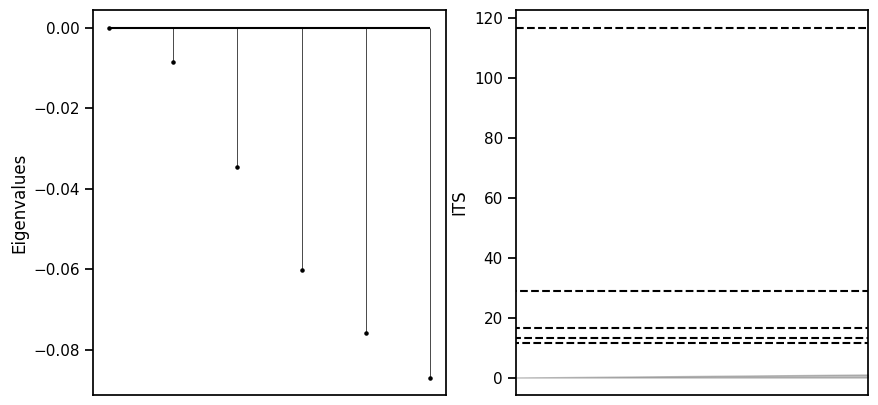

In [9]:
sqra_tp = TransitionPlot(water_sqra_sh)
sqra_tp.transition_obj = sqra
sqra_tp.transition_obj.use_saved = True
sqra_tp.simulation_histogram.use_saved = True
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10, 5))
sqra_tp.plot_its(6, as_line=True, save=False, fig=fig, ax=ax[1])
sqra_tp.plot_eigenvalues(num_eigenv=6, save=False, fig=fig, ax=ax[0])
# x-values are irrelevant, they are just horizontal lines
ax[1].set_xlabel("")
ax[1].set_xticks([])
plt.show()

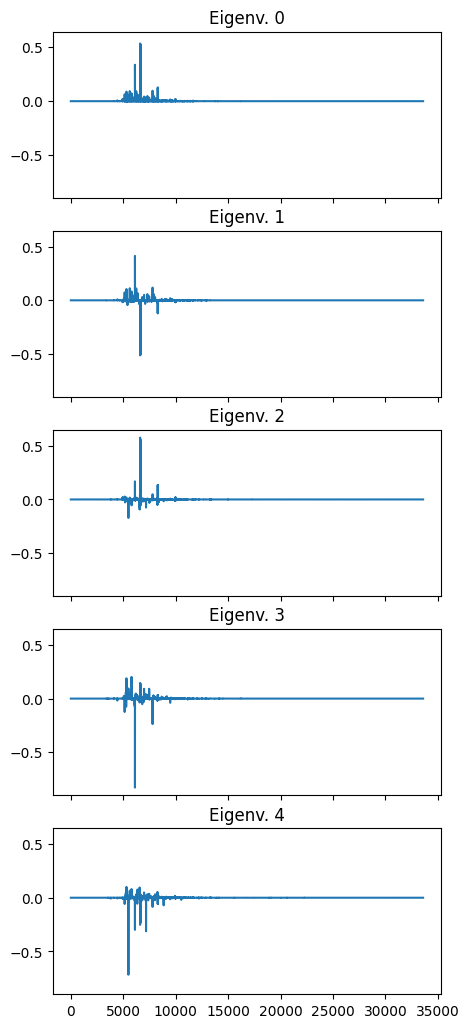

In [10]:
fig, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(5, 12.5))
for i in range(5):
    sqra_tp.plot_one_eigenvector_flat(i, save=False, fig=fig, ax=ax[i])
plt.show()

In [11]:
# view eigenvector 0
my_vm = view_most_populated_eigenv(water_sqra_sh, 0, num_extremes=20)
my_vm.view

In 0th eigenvector 20 most positive cells are [7919, 7300, 6339, 6560, 5492, 6358, 5132, 6631, 6239, 5305, 5791, 5620, 6630, 6608, 6115, 6607, 8310, 8287, 8288, 7795].
[6631, 5492, 6358, 8310, 5132, 5132, 6358, 8287, 5305, 7300, 5791, 6560, 6339, 5132, 7795, 8287, 6115, 6358, 5791, 5305, 6239, 6239, 8310, 7300, 5305, 8288, 6631, 6630, 6358, 6631, 6630, 8310, 8288, 6115, 5791, 6631, 6115, 7919, 5620, 6339, 7919, 5305, 5305, 5132, 6560, 8288, 6631, 6607, 6560, 5132, 6358, 6339, 6239, 5305, 7919, 7300, 5791, 6607, 6339, 5305, 8287, 6358, 6631, 8310, 6608, 6608, 6607, 7300, 6358, 5791, 6239, 5791, 6339, 6239, 8310, 7300, 6607, 6630, 5791, 5305, 7795, 6115, 5132, 5791, 8310, 8287, 6115, 7919, 6631, 8288, 6115, 8288, 6560, 6339, 5791, 6115, 7300, 6607, 7300, 6358, 8287, 6239, 6560, 8287, 6608, 6560, 6607, 7795, 7795, 8288, 6239, 6239, 6630, 8287, 6630, 5132, 6239, 5791, 5132, 5492, 8288, 6560, 6239, 6608, 6339, 8287, 6339, 6630, 5620, 6631, 5620, 7795, 6358, 6608, 7919, 6339, 5620, 5132, 828

NGLWidget()

In [12]:
# view eigenvector 1
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, 1, num_extremes=20)
my_vm.view

In 1st eigenvector 20 most positive cells are [7471, 5740, 6123, 6112, 7919, 6339, 7300, 6120, 6093, 6094, 5277, 6985, 6358, 5132, 5305, 6239, 5791, 6115, 5620, 7795] and most negative [6579, 8311, 7079, 6585, 6582, 5396, 6574, 6560, 7090, 5399, 8310, 5410, 8287, 8288, 6595, 6600, 6607, 6608, 6631, 6630].
[7795, 7300, 7471, 5740, 6094, 6093, 6239, 5740, 7300, 6123, 5791, 7471, 6115, 6339, 7795, 6358, 7300, 6115, 6115, 7795, 6358, 6339, 5277, 5132, 6093, 6560, 6574, 6585, 6595, 8310, 5399, 5410, 6600, 6607, 6608, 5399, 6630, 7079, 6600, 6631, 5399, 6630, 8288, 6595, 5399, 5399, 5396, 6582, 5396, 6600]


NGLWidget()

In [14]:
# view eigenvector 2
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, 2, num_extremes=20)
my_vm.view

In 1st eigenvector 20 most positive cells are [4950, 9967, 9968, 6595, 5277, 9990, 6607, 7795, 6630, 6631, 6094, 8288, 6608, 8311, 4928, 8287, 8310, 6600, 6115, 5132] and most negative [6676, 6575, 6675, 6586, 6573, 5479, 6579, 6574, 5825, 5492, 6636, 8240, 6560, 8265, 5798, 6645, 7172, 8262, 6582, 6585].
[8288, 9968, 6607, 6595, 6094, 8311, 6600, 6115, 8287, 6600, 6115, 8287, 6595, 6600, 6630, 7795, 6630, 8310, 6094, 8288, 4928, 5132, 6115, 6115, 8310, 8262, 6645, 6676, 5492, 5798, 6574, 6579, 5825, 5479, 8262, 8265, 5492, 8262, 8240, 6579, 6676, 8262, 5825, 8262, 6675, 6574, 6636, 6675, 6675, 6645]


NGLWidget()

In [15]:
# view eigenvector 3
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, 3, num_extremes=20)
my_vm.view

In 1st eigenvector 20 most positive cells are [8288, 6200, 7402, 7172, 6239, 6189, 6993, 5722, 5313, 5620, 5244, 5740, 6985, 5492, 6630, 6608, 5305, 7471, 6607, 5791] and most negative [6585, 7774, 7800, 7792, 6582, 6957, 7803, 6120, 9475, 6812, 6123, 6112, 6111, 6560, 6094, 6093, 5277, 5132, 6115, 7795].
[6189, 5313, 8288, 6200, 6189, 5492, 6985, 5740, 6993, 5740, 7402, 8288, 6608, 6189, 6993, 7471, 8288, 5244, 6630, 5722, 6608, 6607, 5791, 6189, 5244, 6093, 6112, 6957, 6093, 7800, 6111, 6585, 6957, 6560, 7774, 6093, 6094, 6560, 7803, 5277, 7792, 5132, 6812, 6957, 6585, 6115, 6111, 6123, 6094, 7792]


NGLWidget()

In [14]:
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, 4, num_extremes=20)
my_vm.view

In 1st eigenvector 20 most positive cells are [4466, 3703, 4010, 3714, 4455, 3701, 4834, 4830, 4028, 3621, 4822, 4821, 4503, 4823, 4833, 4827, 4808, 3914, 3613, 4077] and most negative [5672, 6065, 4432, 4992, 3992, 4877, 5032, 3771, 3792, 4853, 4385, 4411, 4854, 4876, 3779, 3777, 5472, 3587, 3448, 5017].
[3701, 4028, 4466, 3703, 3701, 4823, 4503, 4821, 4834, 4821, 4010, 4466, 4827, 3701, 4834, 3914, 4466, 4822, 4833, 4830, 4827, 3613, 4077, 3701, 4822, 3777, 4411, 4877, 3777, 4432, 4854, 5672, 4877, 4876, 6065, 3777, 3779, 4876, 5032, 5472, 4992, 3587, 4853, 4877, 5672, 3448, 4854, 4385, 3779, 4992]


NGLWidget()

In [ ]:
# smol example
#sqra_name = "H2O_H2O_0395"
sqra_name = "H2O_H2O_0543"
sqra_use_saved = True
water_sqra_sh = SimulationHistogram(sqra_name, "H2O", is_pt=True,
                second_molecule_selection="bynum 4:6", use_saved=sqra_use_saved)

sqra = SQRA(water_sqra_sh, use_saved=sqra_use_saved)
# eigenvectors 
k = 8
sqra_eigenval, sqra_eigenvec = sqra.get_eigenval_eigenvec(num_eigenv=k)
sqra_eigenvec = sqra_eigenvec.squeeze()
sqra_eigenvec = sqra_eigenvec[:, :k]
#print(sqra_eigenvec.shape)
#plt.scatter(*sqra_eigenvec.T)

# spectral clustering
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA

#clustering = KMeans(n_clusters=5)
#clustering.fit(sqra_eigenvec)

sc = SpectralClustering(n_clusters=14)
sc.fit(sqra.get_transitions_matrix())

# plot on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(sqra_eigenvec)
kmeans = KMeans(init="k-means++", n_clusters=6, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


## Geometrical properties of FullGrid

In [73]:
my_full_grid =  #linspace(0.2, 0.6, 20)

Warning! For <=4 points, volumes, areas etc are only estimated.
Warning! For <=4 points, volumes, areas etc are only estimated.
Warning! For <=4 points, volumes, areas etc are only estimated.
Warning! For <=4 points, volumes, areas etc are only estimated.
  (0, 15)	0.7839643375528704
  (0, 20)	0.7839643375528705
  (0, 26)	0.7839643375528705
  (0, 27)	0.7839643375528708
  (0, 30)	0.7839643375528702
  (1, 24)	0.7839643375528713
  (1, 29)	0.7839643375528711
  (1, 32)	0.7839643375528713
  (1, 34)	0.7839643375528702
  (1, 37)	0.7839643375528697
  (2, 25)	0.7839643375528719
  (2, 28)	0.7839643375528704
  (2, 30)	0.7839643375528708
  (2, 34)	0.7839643375528704
  (2, 39)	0.7839643375528708
  (3, 21)	0.7839643375528708
  (3, 35)	0.7839643375528708
  (3, 36)	0.7839643375528719
  (3, 38)	0.7839643375528704
  (3, 41)	0.7839643375528708
  (4, 16)	0.7839643375528708
  (4, 31)	0.7839643375528705
  (4, 33)	0.7839643375528705
  (4, 40)	0.7839643375528704
  (4, 41)	0.7839643375528715
  :	:
  (37, 29)	0.

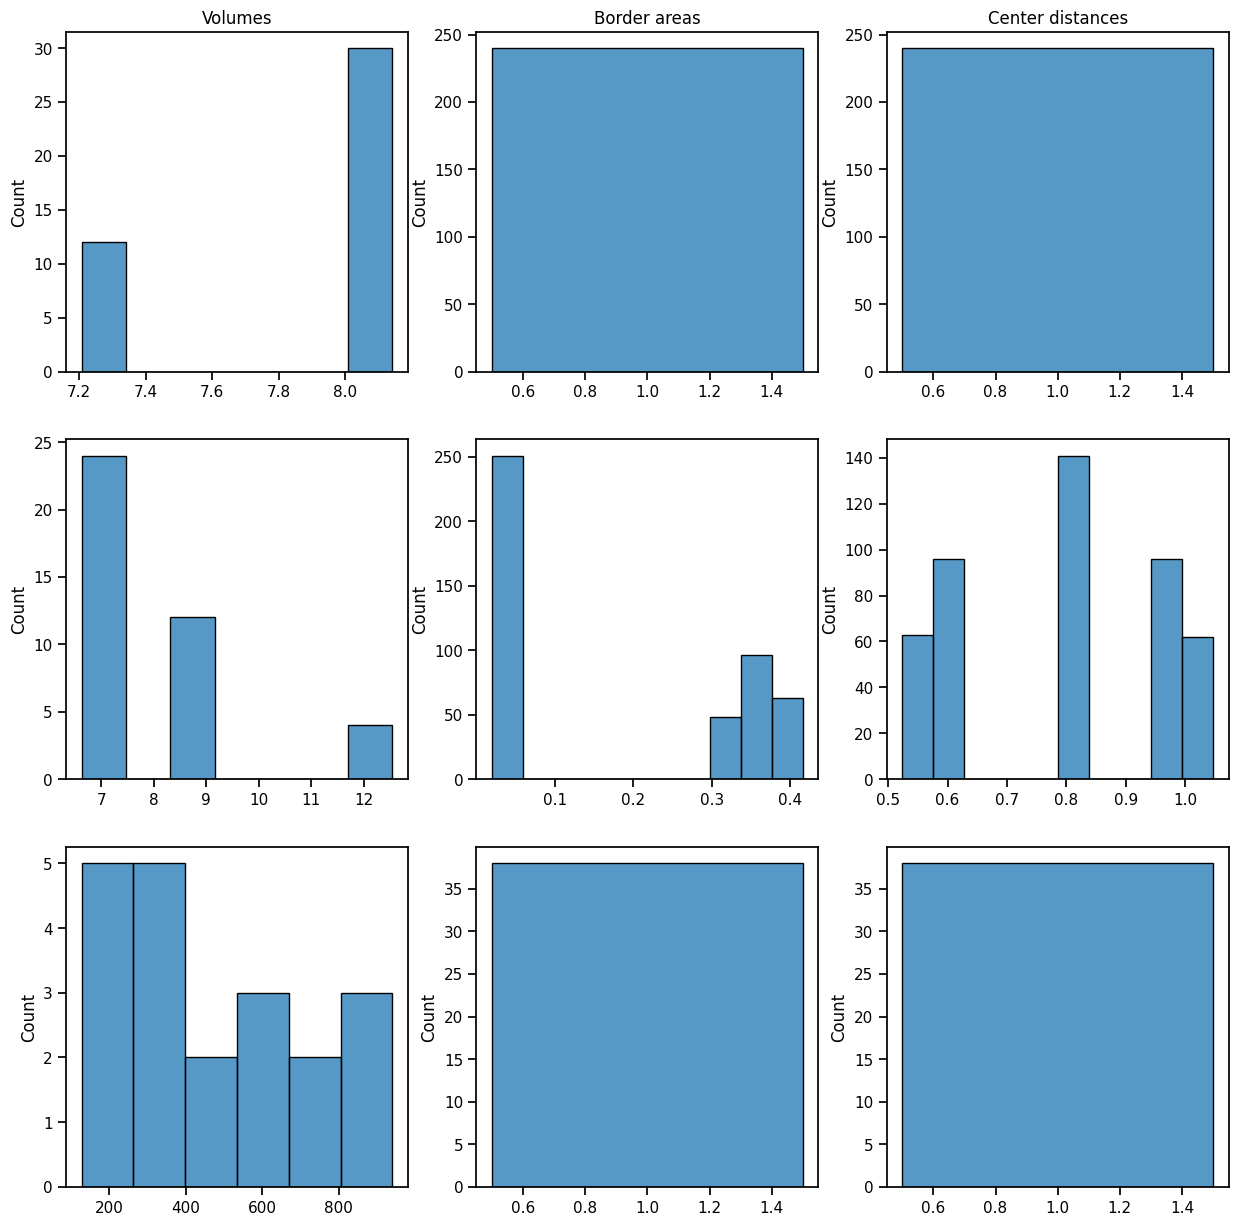

In [90]:
available_fgs = [FullGrid(o_grid_name="42", b_grid_name="1", t_grid_name="[0.1]"),
                FullGrid(o_grid_name="1", b_grid_name="40", t_grid_name="[0.1]"),
                FullGrid(o_grid_name="1", b_grid_name="1", t_grid_name="linspace(0.2, 0.6, 20)")]

fig, ax = plt.subplots(len(available_fgs), 3, figsize=(15, len(available_fgs)*5))
for i, my_full_grid in enumerate(available_fgs):
    all_volumes = my_full_grid.get_total_volumes()
    sns.histplot(all_volumes, ax=ax[i][0])
    all_borders = my_full_grid.get_full_borders()
    print(my_full_grid.position_grid.get_borders_of_position_grid())
    sns.histplot(all_borders.data, ax=ax[i][1])
    all_dist = my_full_grid.get_full_distances()
    sns.histplot(all_dist.data, ax=ax[i][2])
    ax[0][0].set_title("Volumes")
    ax[0][1].set_title("Border areas")
    ax[0][2].set_title("Center distances")
plt.show()

## Timing


SQRA
generating a pseudotrajectory based on two water molecules and FullGrid(o_grid="42", b_grid="40", t_grid="linspace(0.2, 0.6, 20)") as well as calculating all volumes, areas, distances: cca 1min


MSM
assigning to FullGrid(o_grid="42", b_grid="40", t_grid="linspace(0.2, 0.6, 20)") + getting eigenvectors for a 50000000-step trajectory (check ausschreibefrequenz)  cca 2hours 30min